In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [3]:
(x_train_fashion, t_train_fashion), (x_test_fashion, t_test_fashion) = fashion_mnist.load_data()

print("x_train_fashion : ", np.shape(x_train_fashion))
print("t_train_fashion : ", np.shape(t_train_fashion))
print("x_test_fashion : ", np.shape(x_test_fashion))
print("t_test_fashion : ", np.shape(t_test_fashion))

x_train_fashion :  (60000, 28, 28)
t_train_fashion :  (60000,)
x_test_fashion :  (10000, 28, 28)
t_test_fashion :  (10000,)


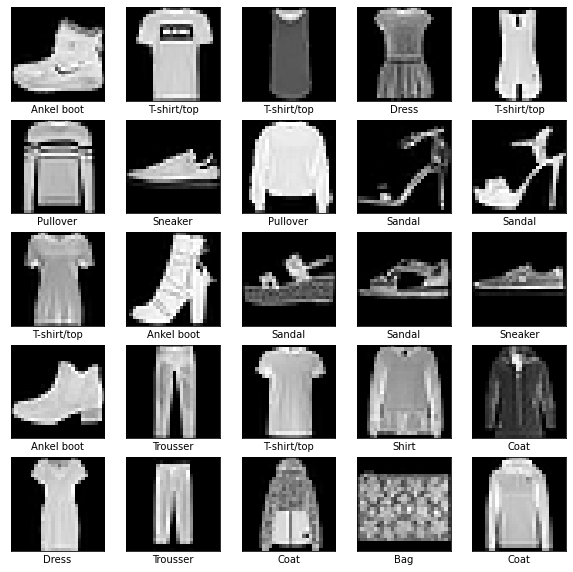

In [4]:
label_names = ["T-shirt/top", "Trousser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

plt.figure(figsize = (10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_fashion[i], cmap = 'gray')
    plt.xlabel(label_names[t_train_fashion[i]])

plt.show()

In [5]:
x_train_fashion = x_train_fashion.astype("float32") / 255.0
x_test_fashion = x_test_fashion.astype("float32") / 255.0

t_train_fashion = to_categorical(t_train_fashion)
t_test_fashion = to_categorical(t_test_fashion)

print("One-hot Vector 적용 후 t_train shape : ", t_train_fashion.shape)
print("One-hot Vector 적용 후 t_test shape : ", t_test_fashion.shape)

One-hot Vector 적용 후 t_train shape :  (60000, 10)
One-hot Vector 적용 후 t_test shape :  (10000, 10)


In [6]:
width = 28
height = 28
channel = 1

model = Sequential(name = 'Fashion_MNIST_CNN')

model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding='same', activation='relu', input_shape = (width, height, channel)))

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(10, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])
model.summary()


Model: "Fashion_MNIST_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)  

In [7]:
model.fit(x_train_fashion, t_train_fashion, epochs = 10, batch_size = 16)

Epoch 1/10
3750/3750 [==============================] - 85s 22ms/step - loss: 0.4016 - accuracy: 0.8560
Epoch 2/10
3750/3750 [==============================] - 82s 22ms/step - loss: 0.2637 - accuracy: 0.9044
Epoch 3/10
3750/3750 [==============================] - 83s 22ms/step - loss: 0.2239 - accuracy: 0.9183
Epoch 4/10
3750/3750 [==============================] - 86s 23ms/step - loss: 0.1966 - accuracy: 0.9284
Epoch 5/10
3750/3750 [==============================] - 88s 23ms/step - loss: 0.1733 - accuracy: 0.9367
Epoch 6/10
3750/3750 [==============================] - 78s 21ms/step - loss: 0.1508 - accuracy: 0.9448
Epoch 7/10
3750/3750 [==============================] - 75s 20ms/step - loss: 0.1348 - accuracy: 0.9508
Epoch 8/10
3750/3750 [==============================] - 75s 20ms/step - loss: 0.1182 - accuracy: 0.9564
Epoch 9/10
3750/3750 [==============================] - 79s 21ms/step - loss: 0.1037 - accuracy: 0.9619
Epoch 10/10
3750/3750 [==============================] - 77s 21m

1/1 [==============================] - 0s 186ms/step
예측 : Coat/ 정답 : Coat


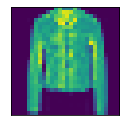

1/1 [==============================] - 0s 29ms/step
예측 : Sandal/ 정답 : Sandal


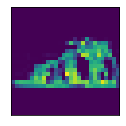

1/1 [==============================] - 0s 26ms/step
예측 : Bag/ 정답 : Sneaker


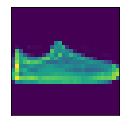

1/1 [==============================] - 0s 25ms/step
예측 : Dress/ 정답 : Dress


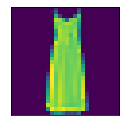

1/1 [==============================] - 0s 26ms/step
예측 : Coat/ 정답 : Coat


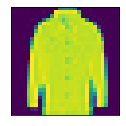

1/1 [==============================] - 0s 24ms/step
예측 : Trousser/ 정답 : Trousser


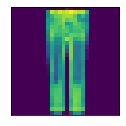

1/1 [==============================] - 0s 25ms/step
예측 : Pullover/ 정답 : Pullover


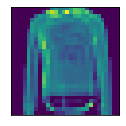

1/1 [==============================] - 0s 25ms/step
예측 : Coat/ 정답 : Coat


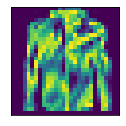

1/1 [==============================] - 0s 23ms/step
예측 : Bag/ 정답 : Bag


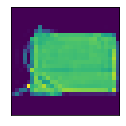

1/1 [==============================] - 0s 24ms/step
예측 : T-shirt/top/ 정답 : T-shirt/top


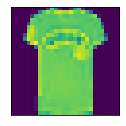

In [8]:
width = 28
height = 28
channel = 1

fashion_label_names = ["T-shirt/top", "Trousser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankel boot"]

for i in range(10, 20):
    plt.figure(figsize = (2, 2))
    
    output = model.predict(x_test_fashion[i].reshape(1, width, height, channel))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test_fashion[i].reshape(width, height, channel))
    
    print("예측 : " + fashion_label_names[np.argmax(output)] + '/ 정답 : ' + fashion_label_names[np.argmax(t_test_fashion[i])])
    plt.show()

In [9]:
loss, accuracy = model.evaluate(x_test_fashion, t_test_fashion, verbose = 1)

print("test loss : ", round(loss, 6))
print("test accuracy : ", round(accuracy * 100, 3), "%")

313/313 [==============================] - 3s 10ms/step - loss: 0.3024 - accuracy: 0.9082
test loss :  0.302384
test accuracy :  90.82 %
